<a href="https://colab.research.google.com/github/MuhammadIrzam447/MultiModel/blob/master/Valid_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import os
from PIL import Image
import torch
from torchvision import datasets, transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder
import torchvision
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import UnidentifiedImageError
from sklearn.metrics import classification_report

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print(device)

cuda


In [3]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# Loading Validation Dataset and Preprocessing

In [4]:
# save_dir = '/content/Model/Fused_ResNetmodel_Hatefull_Experiment#5'
# load_path = os.path.join(save_dir, 'model.pth')

# # Create an instance of the ResNet model
# resnet = torchvision.models.resnet101(pretrained=False)
# resnet.fc = nn.Linear(2048, 2) # Choose the number of output classses as per your model

# # Load the saved model parameters
# # resnet.load_state_dict(torch.load(load_path, map_location=torch.device('cpu')))
# resnet.load_state_dict(torch.load(load_path))

# # Set the model to evaluation mode and respective device
# resnet.eval()
# resnet.to(device)

In [5]:
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [6]:
class ValidationDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.dataset = datasets.ImageFolder(data_dir, transform=val_transform)
        self.classes = sorted(os.listdir(data_dir))
        self.class_lengths = self._compute_class_lengths()

    def _compute_class_lengths(self):
        class_lengths = {cls: 0 for cls in self.classes}

        for cls in self.classes:
            cls_dir = os.path.join(self.data_dir, cls)
            if os.path.isdir(cls_dir):
                class_lengths[cls] = len(os.listdir(cls_dir))

        return class_lengths

    def __getitem__(self, index):
        image, label = self.dataset[index]
        return image, label

    def __len__(self):
        return len(self.dataset)

In [7]:
valPath = "/content/Dataset(s)/joint-food-101/test"
val_dataset = ValidationDataset(valPath)

In [8]:
batch_size = 32
validation_data_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [9]:
print("Number of samples:", len(val_dataset))
print("Number of classes:", len(val_dataset.classes))

Number of samples: 45432
Number of classes: 101


In [10]:
num_batches = len(validation_data_loader)
print("Number of batches:", num_batches)

Number of batches: 1420


# Validation

In [11]:
epoch = 15
save_dir = '/content/Model/Models-Train-02/'
while epoch < 20:
    model_name = str(epoch+1) + "_model.pth"
    load_path = os.path.join(save_dir, model_name)

    # Create an instance of the ResNet model
    resnet = torchvision.models.resnet101(pretrained=False)
    resnet.fc = nn.Linear(2048, 101) # Choose the number of output classses as per your model

    # Load the saved model parameters
    # resnet.load_state_dict(torch.load(load_path, map_location=torch.device('cpu')))
    resnet.load_state_dict(torch.load(load_path))

    # Set the model to evaluation mode and respective device
    resnet.eval()
    resnet.to(device)

    # resnet.eval()

    predicted_classes = []
    actual_labels = []

    with torch.no_grad():
        for images, labels in validation_data_loader:
            # Move the images and labels to the GPU if available
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = resnet(images)

            # Get the predicted labels
            _, predicted_label = torch.max(outputs, 1)

            # Store the predicted and true labels
            predicted_classes.extend(predicted_label.cpu().tolist())
            actual_labels.extend(labels.cpu().tolist())

        accuracy = accuracy_score(actual_labels, predicted_classes)
        precision = precision_score(actual_labels, predicted_classes, average='weighted')
        recall = recall_score(actual_labels, predicted_classes, average='weighted')
        f1 = f1_score(actual_labels, predicted_classes, average='weighted')

        print("Result with model " + model_name + " : ")
        print("=========================================")
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1-score:", f1)
        print(classification_report(actual_labels, predicted_classes))
        epoch = epoch + 1


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 16_model.pth : 
Accuracy: 0.7090817045254446
Precision: 0.7333819121876447
Recall: 0.7090817045254446
F1-score: 0.7145579566349117
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       468
           1       0.78      0.74      0.76       442
           2       0.88      0.69      0.77       452
           3       0.74      0.59      0.65       444
           4       0.50      0.49      0.49       450
           5       0.76      0.75      0.75       448
           6       0.69      0.72      0.70       448
           7       0.88      0.63      0.73       450
           8       0.78      0.75      0.76       452
           9       0.81      0.65      0.72       428
          10       0.81      0.75      0.78       462
          11       0.75      0.76      0.75       454
          12       0.81      0.75      0.78       460
          13       0.75      0.79      0.77       440
          14       0.82      0.71      0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 17_model.pth : 
Accuracy: 0.7174018313083289
Precision: 0.7366455379021567
Recall: 0.7174018313083289
F1-score: 0.7223163632521422
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       468
           1       0.80      0.74      0.77       442
           2       0.77      0.74      0.76       452
           3       0.69      0.58      0.63       444
           4       0.43      0.55      0.48       450
           5       0.80      0.72      0.76       448
           6       0.72      0.73      0.72       448
           7       0.84      0.69      0.76       450
           8       0.75      0.78      0.76       452
           9       0.64      0.66      0.65       428
          10       0.68      0.82      0.75       462
          11       0.72      0.72      0.72       454
          12       0.77      0.75      0.76       460
          13       0.78      0.76      0.77       440
          14       0.82      0.68      0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 18_model.pth : 
Accuracy: 0.7137700299348477
Precision: 0.7358529505548024
Recall: 0.7137700299348477
F1-score: 0.7195725838369258
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       468
           1       0.72      0.77      0.75       442
           2       0.67      0.76      0.71       452
           3       0.48      0.65      0.55       444
           4       0.43      0.50      0.46       450
           5       0.77      0.71      0.74       448
           6       0.82      0.69      0.75       448
           7       0.65      0.72      0.69       450
           8       0.70      0.80      0.75       452
           9       0.67      0.67      0.67       428
          10       0.84      0.76      0.80       462
          11       0.79      0.74      0.77       454
          12       0.87      0.71      0.78       460
          13       0.80      0.78      0.79       440
          14       0.84      0.65      0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 19_model.pth : 
Accuracy: 0.7154208487409756
Precision: 0.7371703935289629
Recall: 0.7154208487409756
F1-score: 0.721701741384861
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       468
           1       0.87      0.70      0.77       442
           2       0.82      0.73      0.77       452
           3       0.51      0.64      0.57       444
           4       0.51      0.51      0.51       450
           5       0.71      0.77      0.74       448
           6       0.73      0.73      0.73       448
           7       0.68      0.72      0.70       450
           8       0.76      0.77      0.76       452
           9       0.71      0.65      0.68       428
          10       0.84      0.74      0.79       462
          11       0.73      0.78      0.75       454
          12       0.86      0.72      0.79       460
          13       0.81      0.78      0.79       440
          14       0.84      0.70      0.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Result with model 20_model.pth : 
Accuracy: 0.7171817221341785
Precision: 0.7395934202955236
Recall: 0.7171817221341785
F1-score: 0.7227221073944964
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       468
           1       0.85      0.72      0.78       442
           2       0.82      0.73      0.78       452
           3       0.72      0.58      0.64       444
           4       0.41      0.53      0.46       450
           5       0.69      0.76      0.73       448
           6       0.81      0.70      0.75       448
           7       0.73      0.71      0.72       450
           8       0.77      0.77      0.77       452
           9       0.62      0.70      0.66       428
          10       0.67      0.82      0.73       462
          11       0.77      0.74      0.76       454
          12       0.81      0.75      0.78       460
          13       0.77      0.73      0.75       440
          14       0.68      0.75      0

In [12]:
accuracy = accuracy_score(actual_labels, predicted_classes)
precision = precision_score(actual_labels, predicted_classes, average='weighted')
recall = recall_score(actual_labels, predicted_classes, average='weighted')
f1 = f1_score(actual_labels, predicted_classes, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7171817221341785
Precision: 0.7395934202955236
Recall: 0.7171817221341785
F1-score: 0.7227221073944964


In [13]:
print(classification_report(actual_labels, predicted_classes))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75       468
           1       0.85      0.72      0.78       442
           2       0.82      0.73      0.78       452
           3       0.72      0.58      0.64       444
           4       0.41      0.53      0.46       450
           5       0.69      0.76      0.73       448
           6       0.81      0.70      0.75       448
           7       0.73      0.71      0.72       450
           8       0.77      0.77      0.77       452
           9       0.62      0.70      0.66       428
          10       0.67      0.82      0.73       462
          11       0.77      0.74      0.76       454
          12       0.81      0.75      0.78       460
          13       0.77      0.73      0.75       440
          14       0.68      0.75      0.71       462
          15       0.52      0.76      0.62       454
          16       0.62      0.62      0.62       448
          17       0.75    

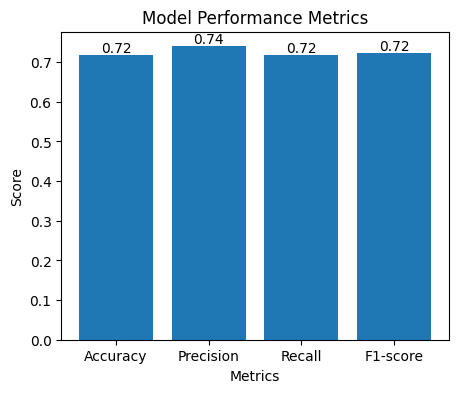

In [14]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(5, 4))
bars = ax.bar(x, values)

# labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# scores on top of each bar
for i, bar in enumerate(bars):
    score = values[i]
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', ha='center', va='bottom')

plt.show()

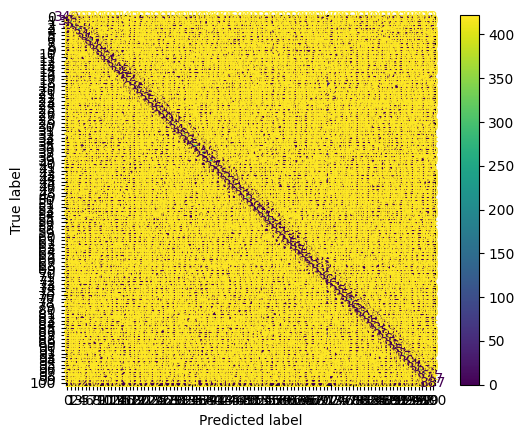

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(actual_labels, predicted_classes)
ConfusionMatrixDisplay(cm).plot()

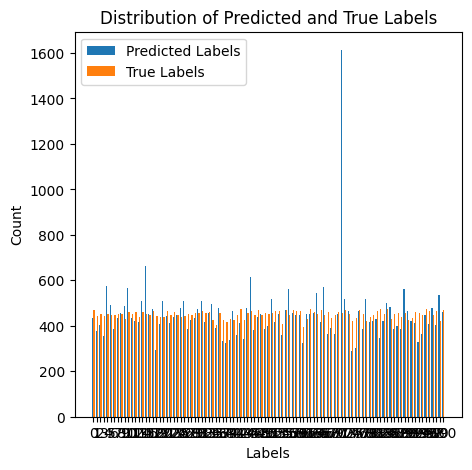

In [16]:
# Count the occurrences of each label in predicted and true labels
predicted_counts = np.bincount(predicted_classes)
true_counts = np.bincount(actual_labels)

# Get the unique labels
labels = np.unique(np.concatenate((predicted_classes, actual_labels)))

# Set the x-axis range
x = np.arange(len(labels))

# Set the width of the bars
width = 0.35

# Plot the predicted and true label counts
fig, ax = plt.subplots(figsize=(5,5))
ax.bar(x - width/2, predicted_counts, width, label='Predicted Labels')
ax.bar(x + width/2, true_counts, width, label='True Labels')

# Add labels, title, and legend
ax.set_xlabel('Labels')
ax.set_ylabel('Count')
ax.set_title('Distribution of Predicted and True Labels')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()